# Computational and Numerical Methods
## Group 16
### Set 7 (17-09-2018): Spline Interpolation
#### Vidhin Parmar   201601003
#### Parth Shah      201601086

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.interpolate import spline
import warnings
warnings.filterwarnings('ignore')
def divdifcoef(x, y):
    '''x : array of data points
       y : array of f(x)  '''
    x.astype(float)
    y.astype(float)
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])

    return np.array(a) # array of coefficients

def divdifEval(a, x, r):
    ''' a : array returned by function coef()
        r : the node to interpolate at  '''
    
    x.astype(float)
    n = len( a ) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # y_value interpolation

# Q1 Cubic spline interpolation of $1/x$:

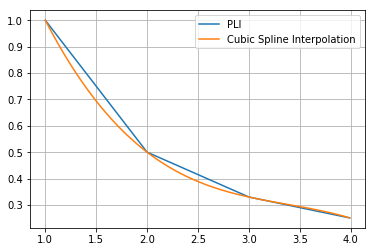

In [3]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0.5, 0.33, 0.25])
xp = np.arange(1, 4, 0.01)
yp = np.interp(xp, x, y)
plt.plot(xp, yp, label = "PLI")
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.legend(loc='best')
plt.grid(True)
plt.show()

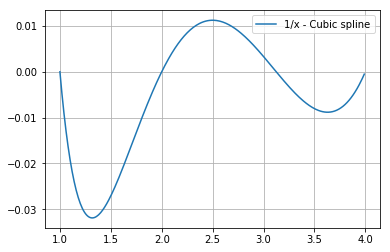

In [4]:
plt.plot(xp, 1/xp - yp, label = "1/x - Cubic spline")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Q2: Q5 of Set-6

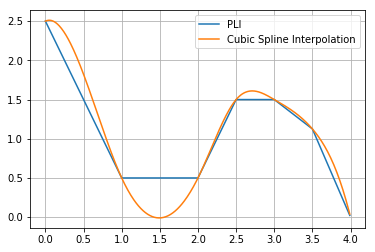

In [5]:
x = np.array([0, 1, 2, 2.5, 3, 3.5, 4])
y = np.array([2.5, 0.5, 0.5, 1.5, 1.5, 1.125, 0])
xp = np.arange(0, 4, 0.01)
yp = np.interp(xp, x, y)
plt.plot(xp, yp, label = "PLI")
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Q3 $y = e^{x} - x^{3}$

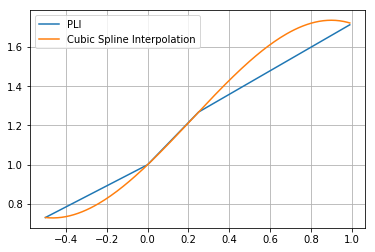

In [10]:
x = np.array([-.5, 0, 0.25, 1])
y = np.array([0.731531, 1, 1.2684, 1.718282])
xp = np.arange(-0.5, 1, 0.01)
yp = np.interp(xp, x, y)
plt.plot(xp, yp, label = "PLI")
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.legend(loc='best')
plt.grid(True)
plt.show()

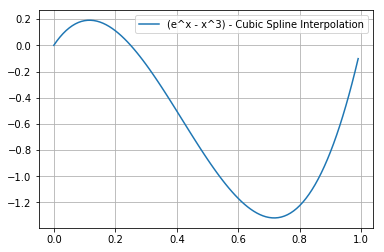

In [6]:
plt.plot(xp, yp - (np.exp(xp) - xp*xp*xp), label = "(e^x - x^3) - Cubic Spline Interpolation")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Now doing theory questions 1, 2, 3 and 4.

# Q1 (0,1),(1,1) and (2,5)

Newton's divided difference coefficients are:
[0.  1.  1.5]


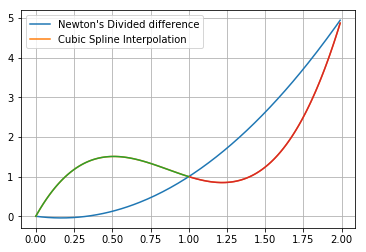

In [7]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 5])
a = divdifcoef(x, y)
xp = np.arange(0,2,0.01)
plt.plot(xp, divdifEval(a, x, xp), label = "Newton's Divided difference")
print("Newton's divided difference coefficients are:")
print(a)
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.plot(xp[0:101], yp[0:101])
plt.plot(xp[101:200], yp[101:200])
plt.legend(loc='best')
plt.grid(True)
plt.show()

f(x) = \begin{cases}7.5 \cdot 10^{-1}\cdot x^3 + 2.5 \cdot 10^{-1}\cdot x, & \text{if } x \in [0,1], \\-7.5 \cdot 10^{-1}\cdot x^3 + 4.5\cdot x^2 + -4.25\cdot x + 1.5, & \text{if } x \in (1,2].\end{cases}

# Q2 $x = [1, 5]$ $y = (3, 1, 2, 3, 2)$

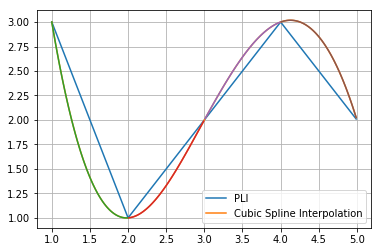

In [8]:
x = np.arange(1, 6, 1)
y = np.array([3, 1, 2, 3, 2])
xp = np.arange(1, 5, 0.01)
yp = np.interp(xp, x, y)
plt.plot(xp, yp, label = "PLI")
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.plot(xp[0:101], yp[0:101])
plt.plot(xp[101:200], yp[101:200])
plt.plot(xp[201:300], yp[201:300])
plt.plot(xp[301:400], yp[301:400])
plt.legend(loc='best')
plt.grid(True)
plt.show()

f(x) = \begin{cases}7.6786 \cdot 10^{-1}\cdot x^3 - 2.3036\cdot x^2 - 4.6429 \cdot 10^{-1}\cdot x + 5, & \text{if } x \in [1,2], \\-8.3929 \cdot 10^{-1}\cdot x^3 + 7.3393\cdot x^2 - 1.9750 \cdot 10^{1}\cdot x + 1.7857 \cdot 10^{1}, & \text{if } x \in (2,3], \\-4.1071 \cdot 10^{-1}\cdot x^3 + 3.4821\cdot x^2 - 8.1786\cdot x + 6.2857, & \text{if } x \in (3,4], \\4.8214 \cdot 10^{-1}\cdot x^3 - 7.2321\cdot x^2 + 3.4679 \cdot 10^{1}\cdot x - 5.0857 \cdot 10^{1}, & \text{if } x \in (4,5].\end{cases}

# Q3 $x = (0, 0.5, 1, 2, 3)$ $y = (0, 0.25, 1, -1, -1)$

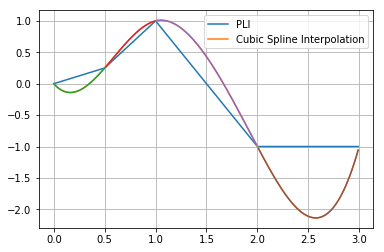

In [9]:
x = np.array([0, 0.5, 1, 2, 3])
y = np.array([0, 0.25, 1, -1, -1])
xp = np.arange(0, 3, 0.01)
yp = np.interp(xp, x, y)
plt.plot(xp, yp, label = "PLI")
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.plot(xp[0:51], yp[0:51])
plt.plot(xp[51:100], yp[51:100])
plt.plot(xp[101:200], yp[101:200])
plt.plot(xp[201:300], yp[201:300])
plt.legend(loc='best')
plt.grid(True)
plt.show()

f(x) = \begin{cases}1.8095\cdot x^3 + 4.7619 \cdot 10^{-2}\cdot x, & \text{if } x \in [0,0.5], \\-5.0476\cdot x^3 + 1.0286 \cdot 10^{1}\cdot x^2 - 5.0952\cdot x + 8.5714 \cdot 10^{-1}, & \text{if } x \in (0.5,1], \\2.5238\cdot x^3 + -1.2429 \cdot 10^{1}\cdot x^2 + 1.7619 \cdot 10^{1}\cdot x - 6.7143, & \text{if } x \in (1,2], \\-9.0476 \cdot 10^{-1}\cdot x^3 + 8.1429\cdot x^2 - 2.3524 \cdot 10^{1}\cdot x + 2.0714 \cdot 10^{1}, & \text{if } x \in (2,3].\end{cases}

# Q4 $x = [0, 1, 2, 2.5, 3, 4]$ $y = [1.4, 0.6, 1, 0.65, 0.6, 1]$

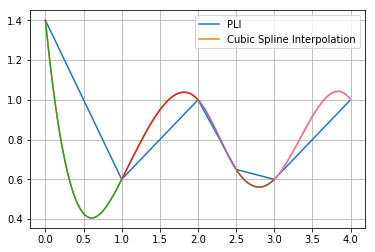

In [10]:
x = np.array([0, 1, 2, 2.5, 3, 4])
y = np.array([1.4, 0.6, 1, 0.65, 0.6, 1])
xp = np.arange(0, 4, 0.01)
yp = np.interp(xp, x, y)
plt.plot(xp, yp, label = "PLI")
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.plot(xp[0:101], yp[0:101])
plt.plot(xp[101:200], yp[101:200])
plt.plot(xp[201:250], yp[201:250])
plt.plot(xp[251:300], yp[251:300])
plt.plot(xp[301:400], yp[301:400])
plt.legend(loc='best')
plt.grid(True)
plt.show()

f(x) = \begin{cases}4.4647 \cdot 10^{-1}\cdot x^3 + -1.2465\cdot x + 1.4, & \text{if } x \in [0,1], \\-1.0324\cdot x^3 + 4.4365\cdot x^2 - 5.6830\cdot x + 2.8788, & \text{if } x \in (1,2], \\2.0166\cdot x^3 - 1.3857 \cdot 10^{1}\cdot x^2 + 3.0905 \cdot 10^{1}\cdot x - 2.1513 \cdot 10^{1}, & \text{if } x \in (2,2.5], \\-6.5228 \cdot 10^{-1}\cdot x^3 + 6.1593\cdot x^2 - 1.9137 \cdot 10^{1}\cdot x + 2.0188 \cdot 10^{1}, & \text{if } x \in (2.5,3], \\-9.6266 \cdot 10^{-2}\cdot x^3 + 1.1552\cdot x^2 - 4.1245\cdot x + 5.1759, & \text{if } x \in (3,4].\end{cases}